1. Introduction

This project centers on the theme of mobility, aiming to address today's pressing global challenges with sustainable transportation solutions. Throughout the project the focusarea will be on shared mobility services, offering emission-free and efficient options to combat climate change, social disparities, and more.
Doing the project we conduct analysis based on predicting bike-sharing demand for clusters of stations using data from Citi Bike, a prominent bike-sharing system in the United States. Tasks include spatial clustering, demand prediction modeling, and fleet repositioning. Furthermore, we elaborate the analysis by exploring multiple unique research questions, uncovering new insights in mobility data using the data science cycle. 

(Extensions: The report may include optional extensions such as expanding the dataset, creating visualizations, and employing advanced data science techniques to enhance the project's value.)

As a final result we aim for this project to leverage data science to optimize mobility operations, foster innovation, and contribute to a sustainable future in urban transportation."

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Trips_2018.csv")

In [5]:
data.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


2. Data cleaning 

The given data consists of multiple variables, in order to make sure the data is ready for in depth analysis we make sure that the data used do not consist of any missing information or lack of measurements as this count lead to outliers. 

As an initial beginning we strip the data for variables that we will exclude from the analysis. 
This includes:
Unnamed, latitude and longitude coordinates, bikeid and usertype. 

We list the columns that are being excluded from the raw data.

In [6]:
excluded_variables = ["Unnamed: 0", "start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude", "bikeid", "usertype"]

Now excluding the multiple specified columns.

In [7]:
data.drop(excluded_variables, axis = 1, inplace = True)

The new data is saved as a new csv file named data1.

In [8]:
data.to_csv("data1.csv", index = False)
data1 = pd.read_csv("data1.csv")

We check the new data to see if the columns are excluded correctly.

In [9]:
data1.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,birth_year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,505.0,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,3255.0,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,525.0,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,447.0,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,3356.0,1992,1


The new data is checked for any missing informations and measurements and thereby clean the data. We use  .isnull() methods from the Panda package to create a Boolean mask specifying where and if there exists any missing values in our data. 

In [10]:
missing_value = data1.isna()
rows_w_nan = data1[missing_value.any(axis = 1)]
print(rows_w_nan)

          tripduration                 starttime                  stoptime  \
10413518          2544  2018-08-15 11:31:37.8670  2018-08-15 12:14:02.1290   
10413697          2004  2018-08-15 11:35:26.0140  2018-08-15 12:08:50.0360   
10415434           213  2018-08-15 12:10:37.4360  2018-08-15 12:14:11.2920   
10415668           602  2018-08-15 12:15:17.3330  2018-08-15 12:25:19.7620   
10417031        511502  2018-08-15 12:41:41.9690  2018-08-21 10:46:44.6440   
...                ...                       ...                       ...   
17390711           589  2018-12-24 14:22:12.3950  2018-12-24 14:32:01.6410   
17393046           362  2018-12-24 15:34:09.8420  2018-12-24 15:40:12.1510   
17393363           276  2018-12-24 15:44:26.6440  2018-12-24 15:49:03.3450   
17423361           626  2018-12-26 15:08:40.3100  2018-12-26 15:19:06.8170   
17516014           464  2018-12-30 13:35:47.1420  2018-12-30 13:43:31.7420   

          start_station_id  end_station_id  birth_year  gender 

In [22]:
data1_cleaned = data1.dropna()

We now convert the starttime and stoptime from strings to datetime in order to make the data in numeric values. However, in order to be able to do so we first of all need to we comvert the original dataframe to a copy called data2.

In [23]:
data2 = data1_cleaned.copy()
data2["starttime"] = pd.to_datetime(data2["starttime"], format="%Y-%m-%d %H:%M:%S.%f")
data2["stoptime"] = pd.to_datetime(data2["stoptime"], format="%Y-%m-%d %H:%M:%S.%f")

In [24]:
data2.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,birth_year,gender
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,505.0,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,3255.0,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,525.0,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,447.0,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,3356.0,1992,1


We look at the starttime and stopttime and elimate any impossible trips denoted by trips quicker than 1 minut and or longer than 5 hours. 

In [25]:
data2 = data2[(data2['stoptime'] - data2['starttime']).dt.total_seconds() >= 60]  
data2 = data2[(data2['stoptime'] - data2['starttime']).dt.total_seconds() <= 5 * 60 * 60]

We have now cleaned and updated our dataset trough different steps. In order to check if some steps should be modified, excluded or if we need further cleaning and adjustments we evaluate the current dataset by descriptive statistics.

In [28]:
data2_descriptive_stats = data2.describe()
pd.options.display.float_format = '{:.2f}'.format
print(data2_descriptive_stats)

       tripduration  start_station_id  end_station_id  birth_year      gender
count   17530389.00       17530389.00     17530389.00 17530389.00 17530389.00
mean         824.58           1588.90         1580.31     1978.99        1.15
std          808.80           1439.35         1438.39       11.93        0.54
min           61.00             72.00           72.00     1885.00        0.00
25%          358.00            380.00          380.00     1969.00        1.00
50%          604.00            505.00          505.00     1981.00        1.00
75%         1058.00           3249.00         3249.00     1989.00        1.00
max        20106.00           3721.00         3721.00     2002.00        2.00


Tripduration:
The dataset contains approximately 17.5 million entries.
The average trip duration is about 824.58 seconds (approximately 13.7 minutes).
The standard deviation is around 808.80 seconds, indicating a fair amount of variability in trip durations.
The shortest trip duration is 61 seconds, while the longest trip duration is 20,106 seconds (about 5 hours and 35 minutes).

Start_station_id and end_station_id:
The columns "start_station_id" and "end_station_id" have similar summary statistics.
They both have a similar count of approximately 17.5 million entries.
The statistics include the mean, standard deviation, minimum, and maximum values of station IDs.

Birth_year:
The dataset contains approximately 17.5 million entries.
The average birth year is approximately 1978.99, suggesting that the majority of users were born around 1979.
The standard deviation of approximately 11.93 indicates some variability in birth years.
The minimum birth year is 1885, and the maximum birth year is 2002.

Gender:
The dataset contains approximately 17.5 million entries.
The "gender" column seems to have three unique values represented as 0, 1, and 2.
The mean of approximately 1.15 suggests that there is a dominant gender value (likely 1).
The standard deviation of approximately 0.54 indicates some variability in gender values.

DESCRIPTIVE STATS: 
Tendency (Central Tendency):

Mean (Average):
For "tripduration," the average trip duration is about 824.58 seconds (approximately 13.7 minutes).
For "start_station_id" and "end_station_id," the average values indicate central station IDs.
For "birth_year," the average birth year is around 1978.99, suggesting that the majority of users were born around 1979.
For "gender," the mean of approximately 1.15 indicates a dominant gender value (likely 1).

Spread (Variability):
Standard Deviation (std):
For "tripduration," the standard deviation is approximately 808.80 seconds, indicating a fair amount of variability in trip durations.
For "start_station_id" and "end_station_id," the standard deviations are relatively high, showing variability in station IDs.
For "birth_year," the standard deviation of approximately 11.93 suggests some variability in birth years.
For "gender," the standard deviation of approximately 0.54 indicates variability in gender values.
Distribution:

Minimum and Maximum:
The "tripduration" column has a wide distribution with a minimum of 61 seconds and a maximum of 20,106 seconds, indicating trips of varying lengths.
The "start_station_id" and "end_station_id" columns show the range of station IDs in your dataset.
The "birth_year" column spans from 1885 to 2002, with some users having birth years that fall outside the typical range.
The "gender" column has three unique values (0, 1, and 2), which suggests that it's not binary and may represent different gender categories.

To gain a deeper understanding of your dataset, we create visualizations. 

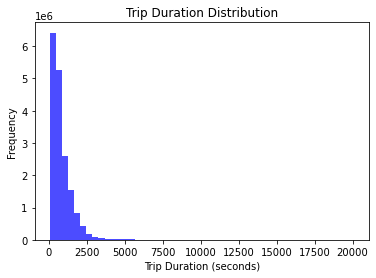

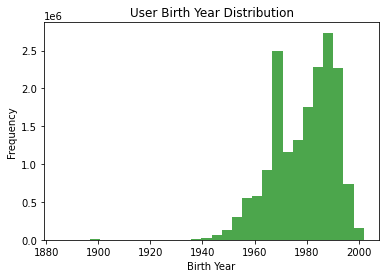

In [29]:
# Histogram for trip duration
plt.hist(data2['tripduration'], bins=50, color='blue', alpha=0.7)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Histogram for birth year
plt.hist(data2['birth_year'], bins=30, color='green', alpha=0.7)
plt.title('User Birth Year Distribution')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

BOXPLOT

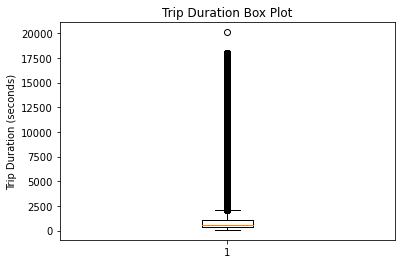

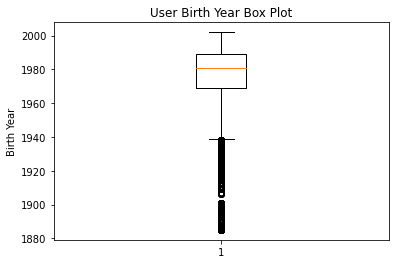

In [30]:
# Box plot for trip duration
plt.boxplot(data2['tripduration'])
plt.title('Trip Duration Box Plot')
plt.ylabel('Trip Duration (seconds)')
plt.show()

# Box plot for birth year
plt.boxplot(data2['birth_year'])
plt.title('User Birth Year Box Plot')
plt.ylabel('Birth Year')
plt.show()

Scatterplots

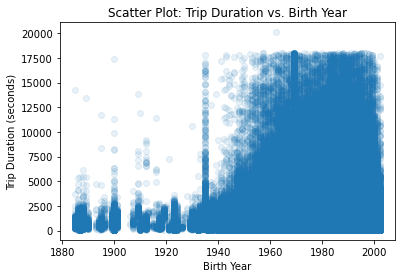

In [31]:
# Scatter plot between trip duration and birth year
plt.scatter(data2['birth_year'], data2['tripduration'], alpha=0.1)
plt.title('Scatter Plot: Trip Duration vs. Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration (seconds)')
plt.show()

Additionally, we consider temporal trends by creating a time series plots in order to evaluate trends over time, such as bike rental patterns by hour, day, or month. We use the starttime variable as our timestamp.

In [38]:
data2['starttime'] = pd.to_datetime(data2['starttime'])
data2.set_index('starttime', inplace=True)

# Resample data by day (you can adjust the frequency as needed)
daily_data = data2.resample('D').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Temporal Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

KeyError: 'starttime'

Next, we visualize Correlation matrices and scatter plots with the goal of exploring the relationships between numerical variables by creating correlation matrices or scatter plots to identify correlations, positive or negative.

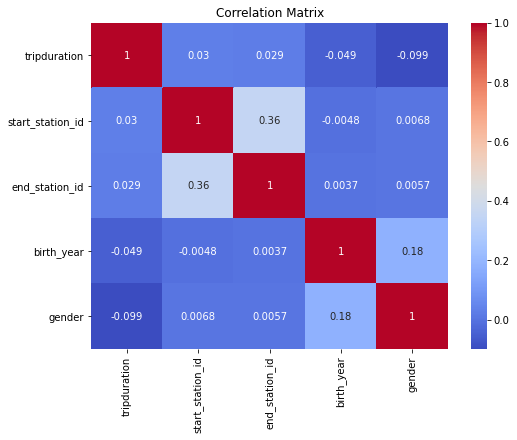

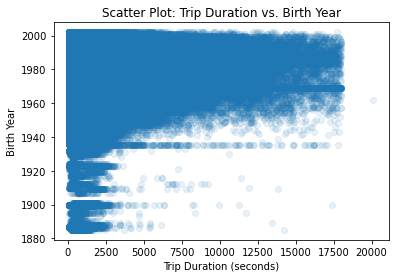

In [39]:
correlation_matrix = data2.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for two numerical variables (e.g., 'tripduration' and 'birth_year')
plt.scatter(data2['tripduration'], data2['birth_year'], alpha=0.1)
plt.title('Scatter Plot: Trip Duration vs. Birth Year')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Birth Year')
plt.show()


We also consider the categorical variables by visualize the distribution of categories within categorical variables, such as station IDs or user types. Furthermore, by adding a
stacked bar plots we also examine how different categories within a variable relate to one another or change over time.

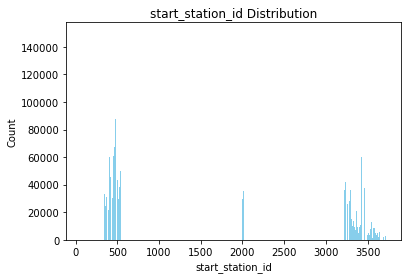

In [41]:
user_type_counts = data2['start_station_id'].value_counts()

plt.bar(user_type_counts.index, user_type_counts.values, color='skyblue')
plt.title('start_station_id Distribution')
plt.xlabel('start_station_id')
plt.ylabel('Count')
plt.show()


Checking and identifying potential outliers in your data by visually inspecting box plots and scatter plots.

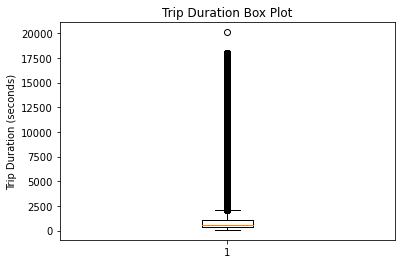

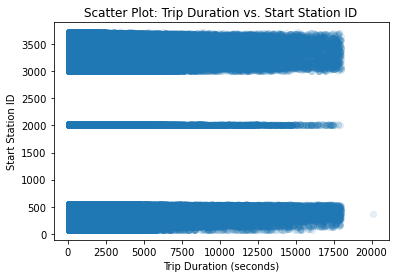

In [42]:
# Box plot for a numerical variable, e.g., 'tripduration'
plt.boxplot(data2['tripduration'])
plt.title('Trip Duration Box Plot')
plt.ylabel('Trip Duration (seconds)')
plt.show()

# Scatter plot for two numerical variables (e.g., 'tripduration' and 'start_station_id')
plt.scatter(data2['tripduration'], data2['start_station_id'], alpha=0.1)
plt.title('Scatter Plot: Trip Duration vs. Start Station ID')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Start Station ID')
plt.show()

Looking into grouped data to study data trends based on groupings, such as average trip duration per month or station. -> needs modifications in the data starttime, split time and date.

In [43]:
# Assuming you have a grouping variable 'month' (e.g., extracted from 'timestamp')
monthly_means = data2.groupby('month')['tripduration'].mean()

# Grouped bar plot for monthly trip duration means
monthly_means.plot(kind='bar', color='lightgreen')
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

KeyError: 'month'

Evaluate distributions Distributions:

Probability density functions (PDFs) or cumulative distribution functions (CDFs).
Visualize the probability distribution of your numerical variables.

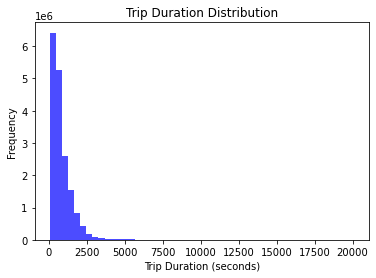

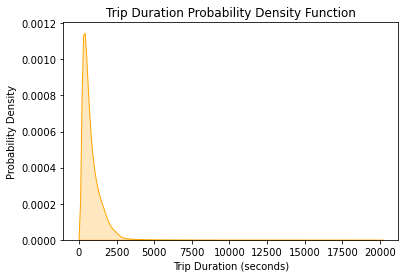

In [44]:
# Histogram for a numerical variable, e.g., 'tripduration'
plt.hist(data2['tripduration'], bins=50, color='blue', alpha=0.7)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Probability density function (PDF) for a numerical variable
sns.kdeplot(data2['tripduration'], shade=True, color='orange')
plt.title('Trip Duration Probability Density Function')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Probability Density')
plt.show()

NOT NECESSARILY DONE WITH DATA-CLEANING...

Comment for task 2: We see that for the same start station id 72 the longitude and latitude is the same for all cases of station 72. Furthermore, we check to see how many different starting stations we have in the dataset and thereby cluster the data into 20 clusters. 

In [ ]:
unique_values = data1["start_station_id"].nunique()
print(unique_values)

We find the optimal number of clusters to make, knowning that we need to create no less than 20 clusters. In order to do so we use the K-means technique.

In [ ]:
unique_stations = data1['start_station_id'].unique()
station_count = len(unique_stations)

# Print the number of unique start_station_ids and their names
print(f"Number of unique start_station_ids: {station_count}")
print("Unique start_station_ids:")
for station_id in unique_stations:
    count = data1['start_station_id'].value_counts()[station_id]
    print(f"Station {station_id}: {count} trips")


In [ ]:
# Sample code that prints station information
unique_stations = data1['start_station_id'].unique()
station_count = len(unique_stations)

# Create lists to store station information
station_ids = []
trip_counts = []

for station_id in unique_stations:
    count = data1['start_station_id'].value_counts()[station_id]
    station_ids.append(station_id)
    trip_counts.append(count)

# Create a new DataFrame from the lists
station_data = pd.DataFrame({
    'start_station_id': station_ids,
    'trip_count': trip_counts
})

# Save the DataFrame to a CSV file
station_data.to_csv('station_data.csv', index=False)


In [ ]:
station_data.head()

We cluster the stations spatially based on nearby departing stations such that they are grouped together. 

Contribution table: 


| Section         | Contributors        |
|-----------------|---------------------|
| Introduction    | s180733             |
| Data Cleaning   | s180733, s180317     |
| Prediction challenge, clustering   | s180733, s180317     |
| Prediction challenge, prediction model  |  |
